<a href="https://colab.research.google.com/github/angeloken/Riset-I-smile/blob/main/riset_prediksi_listrik_ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import date
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
df = pd.read_csv('/content/opsd_germany_daily.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [17]:
df = df[['Date','Consumption']]

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.set_index(df['Date'],inplace=True)


In [20]:
df=df.drop(['Date'],axis=1)

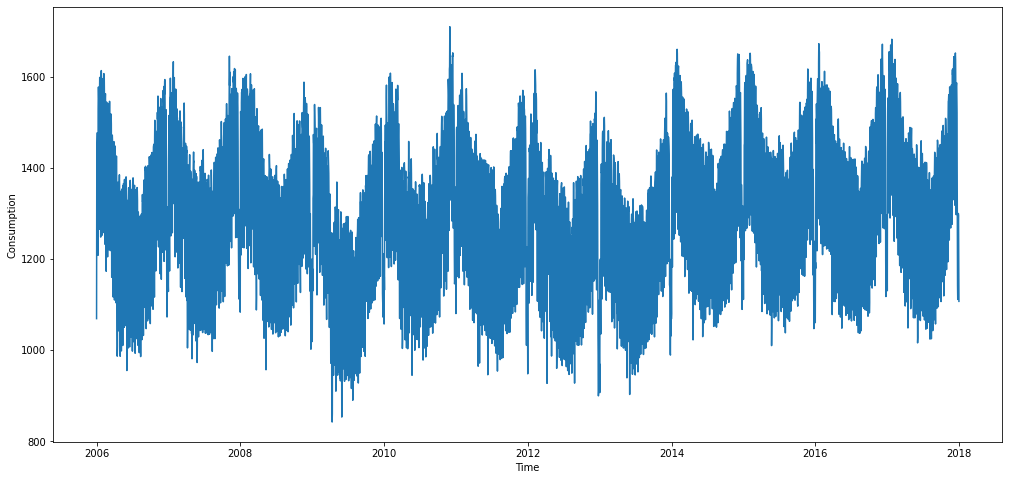

In [21]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df.columns:
    plot_data(col)

In [23]:
df.tail(30)

,Consumption
Date,
2017-12-02,1391.85405
2017-12-03,1330.26226
2017-12-04,1620.97758
2017-12-05,1643.72307
2017-12-06,1639.08265
2017-12-07,1628.47979
2017-12-08,1618.05658
2017-12-09,1415.34531
2017-12-10,1318.10964


In [ ]:
from sklearn.preprocessing import minmax_scale
scaler = minmax_scale(df['Consumption'].values)

In [ ]:
df['Consumption'] = scaler

In [24]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [25]:
df = df.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


In [26]:
prediction_size = 30
train_df = df[:-prediction_size]

In [27]:
train_df

,ds,y
0,2006-01-01,1069.18400
1,2006-01-02,1380.52100
2,2006-01-03,1442.53300
3,2006-01-04,1457.21700
4,2006-01-05,1477.13100
...,...,...
4348,2017-11-27,1602.17797
4349,2017-11-28,1615.38061
4350,2017-11-29,1603.98435
4351,2017-11-30,1617.03309


In [28]:
m = Prophet()
m.fit(train_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)

In [ ]:
future.tail(30)

,ds
4353,2017-12-02
4354,2017-12-03
4355,2017-12-04
4356,2017-12-05
4357,2017-12-06
4358,2017-12-07
4359,2017-12-08
4360,2017-12-09
4361,2017-12-10
4362,2017-12-11


In [33]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

             ds         yhat   yhat_lower   yhat_upper
4353 2017-12-02  1408.696760  1324.367466  1489.986719
4354 2017-12-03  1311.189771  1227.785049  1389.035827
4355 2017-12-04  1596.631743  1515.628151  1676.703020
4356 2017-12-05  1631.873949  1546.545275  1711.282974
4357 2017-12-06  1632.057664  1552.246848  1713.403115
4358 2017-12-07  1612.932882  1534.447434  1686.779585
4359 2017-12-08  1578.265990  1494.499660  1652.358419
4360 2017-12-09  1374.218097  1289.336509  1459.996646
4361 2017-12-10  1265.694052  1187.858148  1345.115210
4362 2017-12-11  1540.398051  1457.906410  1624.298938
4363 2017-12-12  1565.398845  1487.300113  1649.818034
4364 2017-12-13  1556.051209  1474.819833  1637.607600
4365 2017-12-14  1528.309835  1447.669344  1606.606735
4366 2017-12-15  1486.132315  1405.418942  1565.304408
4367 2017-12-16  1275.852999  1200.000435  1356.167834
4368 2017-12-17  1162.527884  1083.744201  1240.626557
4369 2017-12-18  1433.986555  1354.705673  1514.169880
4370 2017-

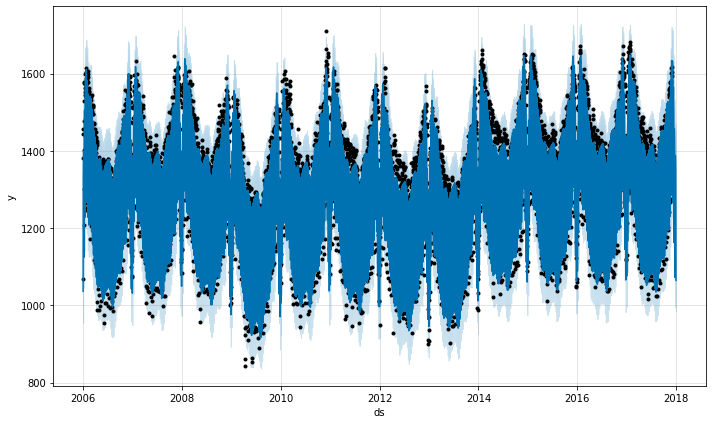

In [31]:
m.plot(forecast)
plt.show()

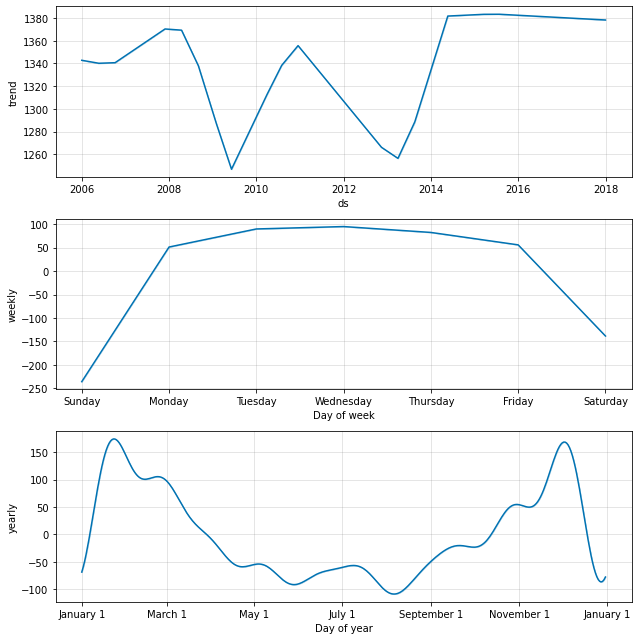

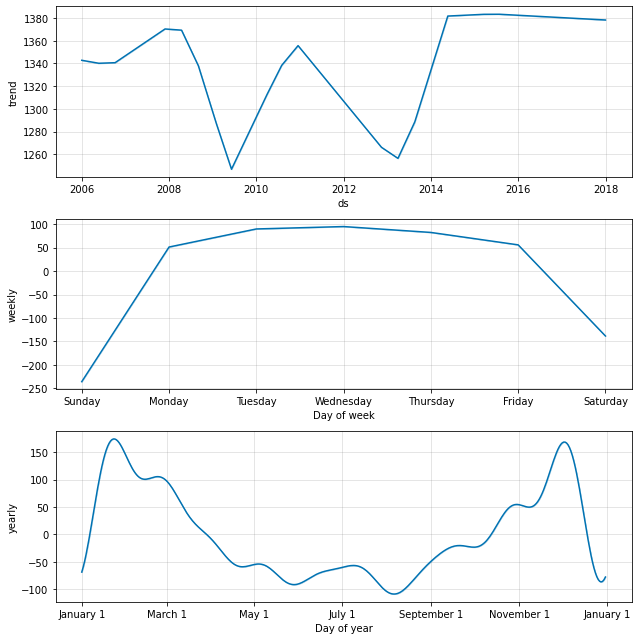

In [ ]:
m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [34]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [35]:
cmp_df = make_comparison_dataframe(df, forecast)

cmp_df.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-12-27,1387.603669,1308.500026,1469.096578,1263.94091
2017-12-28,1373.909097,1297.887283,1453.897223,1299.86398
2017-12-29,1348.358439,1265.860643,1429.879020,1295.08753
2017-12-30,1157.021610,1078.040494,1240.665629,1215.44897
2017-12-31,1064.643890,985.061370,1147.050906,1107.11488


In [36]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [37]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 6.035705004403182
MAE 81.81595899989246


In [ ]:
!pip install prophet.diagnostics

ERROR: Could not find a version that satisfies the requirement prophet.diagnostics (from versions: none)
ERROR: No matching distribution found for prophet.diagnostics


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='1383 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 15 forecasts with cutoffs between 2010-01-07 00:00:00 and 2016-12-01 00:00:00


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.009681,0.098394,0.064642,0.179215,0.076099,0.806338
1,38 days,0.009627,0.098118,0.064792,0.178546,0.078846,0.801828
2,39 days,0.009405,0.096982,0.064897,0.170947,0.079448,0.795369
3,40 days,0.009069,0.095233,0.064635,0.158794,0.080301,0.791834
4,41 days,0.008877,0.094218,0.064531,0.152781,0.080857,0.785375


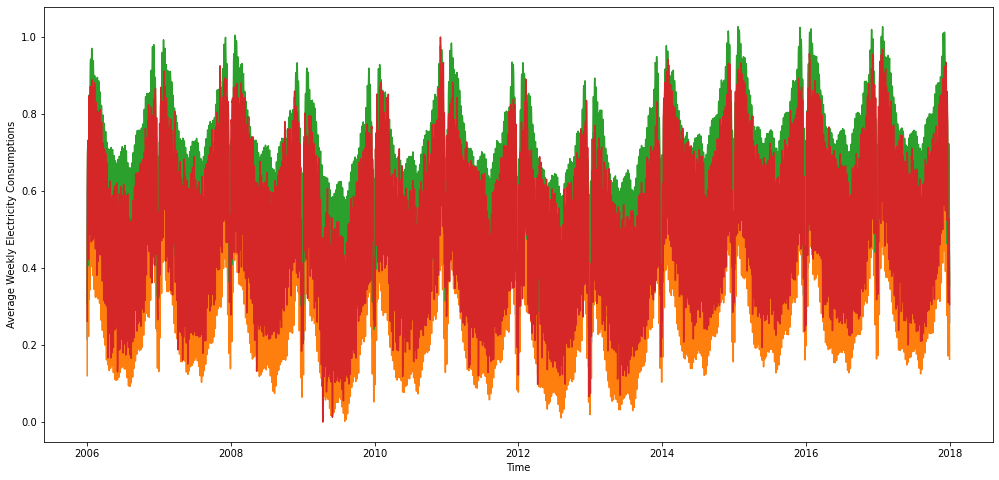

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly Electricity Consumptions')
plt.grid(False)
plt.show()